In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('data/Data_.xlsx')
X = data.drop(columns=['EC'])
y = data['EC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.01, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
joblib.dump(xgb_model, 'models/xgb_model.joblib')


['models/xgb_model.joblib']

In [16]:
# Load the model
xgb_model = joblib.load('models/xgb_model.joblib')


In [29]:
import shap
import matplotlib.pyplot as plt

# Explain the model predictions using SHAP
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test_scaled)

# Summary plot
plt.figure()
shap.summary_plot(shap_values_xgb, X_test, feature_names=X.columns, show=False)
plt.title('XGB SHAP summary plot')
#plt.show()
plt.savefig('imgs/shap_summary_xgb.png', bbox_inches='tight')  # Save the plot
plt.close()

# Dependence plots
for feature in X.columns:
    shap.dependence_plot(feature, shap_values_xgb, X_test, feature_names=X.columns, show=False)
    plt.title(f'XGB SHAP dependence plot for {feature}')
    plt.savefig(f'imgs/shap_dependence_xgb_{feature}.png')  # Save the plot
    plt.close()



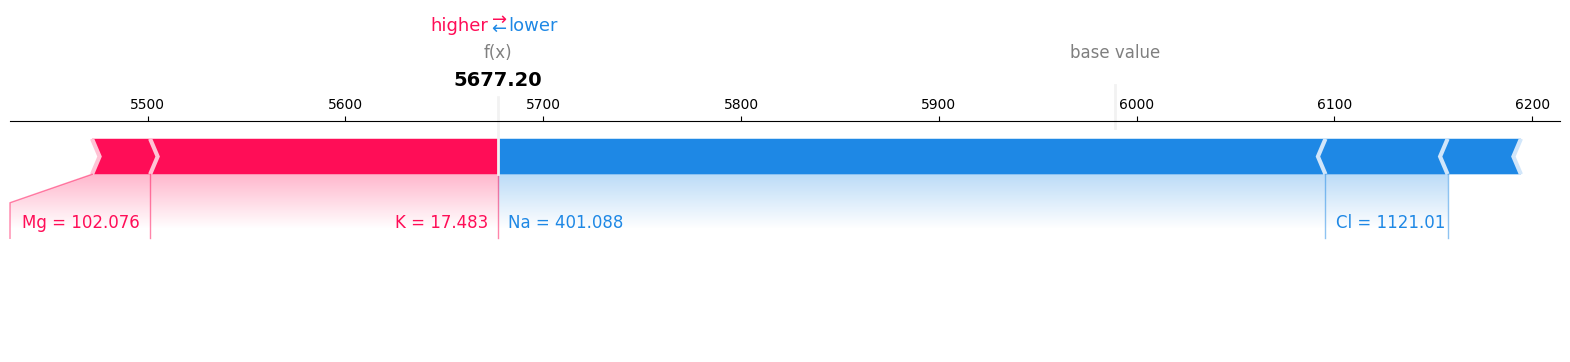

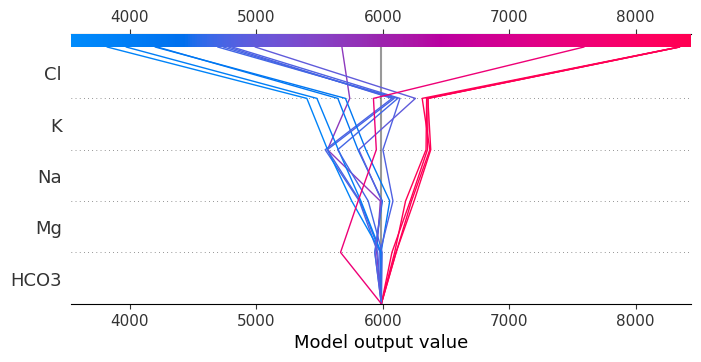

In [35]:
# Force plot for a single prediction (example for the first instance)
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0,:], X_test.iloc[0,:], matplotlib=True)
plt.savefig('imgs/shap_force_xgb.png')  # Save the plot
plt.close()

# Decision plot
plt.figure()
shap.decision_plot(explainer_xgb.expected_value, shap_values_xgb, X_test, feature_names=list(X.columns))
plt.title('XGB SHAP decision plot')
plt.savefig('imgs/shap_decision_xgb.png')  # Save the plot
plt.close()


In [7]:
#Random Forest Model

In [36]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
joblib.dump(rf_model, 'models/rf_model.joblib')


['models/rf_model.joblib']

In [37]:
# Load the model
rf_model = joblib.load('models/rf_model.joblib')


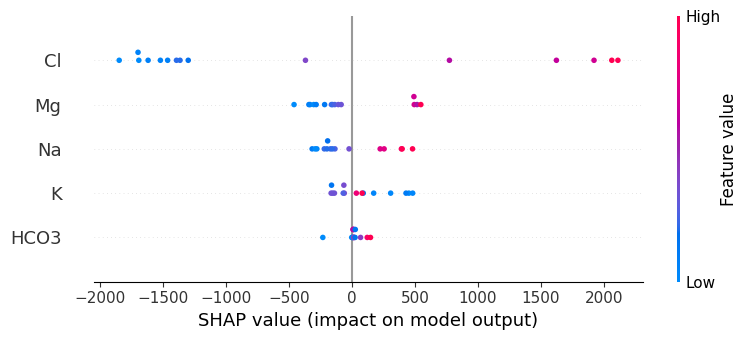

In [39]:
# Explain the model predictions using SHAP
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values_rf, X_test, feature_names=X.columns)
plt.savefig('imgs/shap_summary_rf.png')  # Save the plot
plt.close()

# Dependence plots
for feature in X.columns:
    shap.dependence_plot(feature, shap_values_rf, X_test, feature_names=X.columns, show=False)
    plt.savefig(f'imgs/shap_dependence_rf_{feature}.png')  # Save the plot
    plt.close()


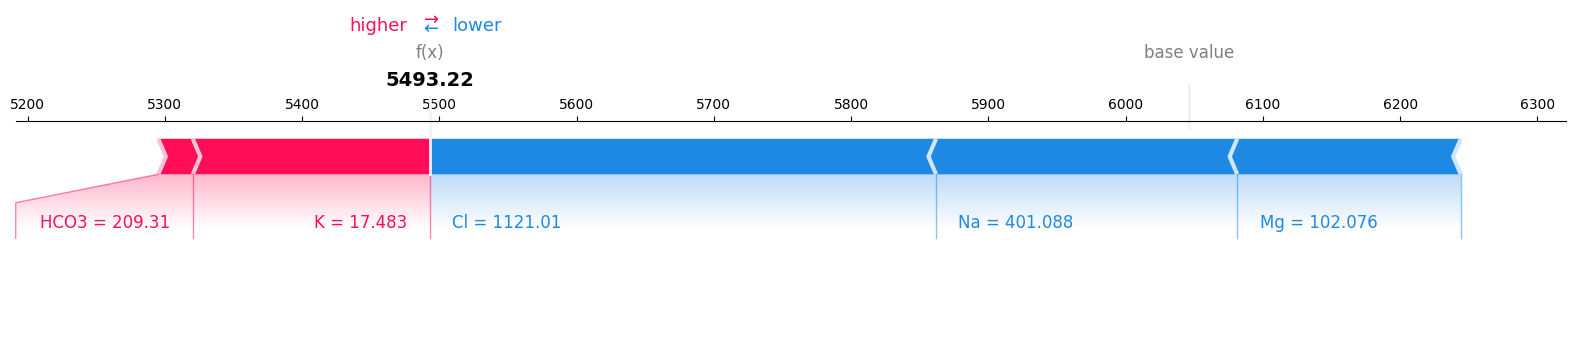

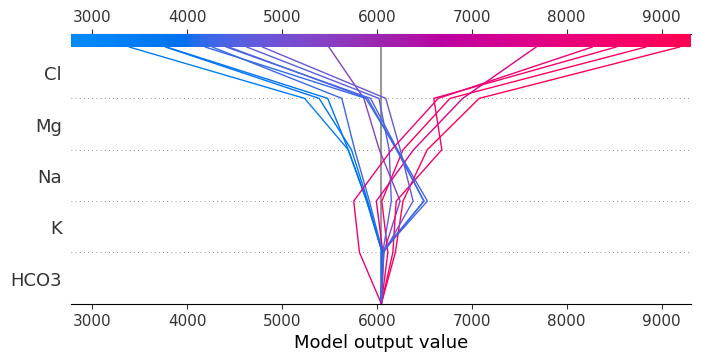

In [40]:
# Force plot for a single prediction (example for the first instance)
shap.force_plot(explainer_rf.expected_value, shap_values_rf[0,:], X_test.iloc[0,:], matplotlib=True)
plt.savefig('imgs/shap_force_rf_0.png')  # Save the plot
plt.close()

# Decision plot
shap.decision_plot(explainer_rf.expected_value, shap_values_rf, X_test, feature_names=list(X.columns))
plt.savefig('imgs/shap_decision_rf.png')  # Save the plot
plt.close()


In [12]:
# Save SHAP values for XGBoost
np.save('shap_values_xgb.npy', shap_values_xgb)
np.save('shap_base_value_xgb.npy', explainer_xgb.expected_value)

# Save SHAP values for Random Forest
np.save('shap_values_rf.npy', shap_values_rf)
np.save('shap_base_value_rf.npy', explainer_rf.expected_value)
